In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import torch
import pandas as pd
import matplotlib.dates as mdates


In [3]:
params = {
    "pgf.texsystem": "xelatex",
    "pgf.rcfonts": False,
    "font.serif": [],
    "font.sans-serif": [],
    "axes.labelsize": 11,
}
plt.rcParams.update(params)
rc("text", usetex=True)

CM = 1 / 2.54
cmap = plt.cm.get_cmap("viridis")

In [4]:
def to_mpl(start: str, end: str):
    mpl_start = mdates.date2num(pd.to_datetime(start))
    mpl_end = mdates.date2num(pd.to_datetime(end))
    return mpl_start, mpl_end - mpl_start


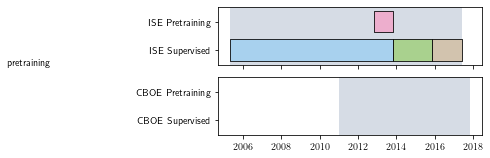

In [23]:
fig, (ax, bx) = plt.subplots(2, 1,sharey="none", sharex="col", figsize=(12 * CM, 6 * CM))

# ise
ise_tot = [to_mpl("2005-05-02", "2017-05-31")]
ax.broken_barh(ise_tot, (1, 5), facecolors="#D6DCE5")

# ise semi
ax.broken_barh([to_mpl("2012-10-23", "2013-10-24")], (2.5, 1), facecolors="#EDAECD",edgecolor='black', linewidth=0.8)

ax.text(sum(ise_tot[0]) * 0.5 ,1, "pretraining", color = 'black')

# print(foo.axes)

# for idx,each_bar in enumerate(foo.axes.patches): 
#     print(each_bar)
#     plt.text(each_bar.get_x() + each_bar.get_width() / 2.0, 20, "pretraining", color='red', ha='center', va='center', rotation='vertical')


# ise supervised
ax.broken_barh(
    [
        to_mpl("2005-05-02", "2013-10-24"),
        to_mpl("2013-10-25", "2015-11-05"),
        to_mpl("2015-11-06", "2017-05-31"),
    ],
    (1.2, 1),
    facecolors=("#A8D1EE", "#A9D18E", "#D2C3AE"), edgecolor="black",linewidth=0.8
)
ax.xaxis_date()
plt.setp(ax.get_xticklabels(), visible=True)
# CBOE
# ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
#                 facecolors=('tab:orange', 'tab:green', 'tab:red'))
# cboe
bx.broken_barh([to_mpl("2011-01-01", "2017-10-31")], (1, 5),facecolors="#D6DCE5")
# ax.set_xlim(to_mpl("2005-01-01", "2018-12-31"))
# ax.set_xlabel('seconds since start')
# Modify y-axis tick labels
bx.set_yticks(
    [1.7,3], labels=["CBOE Supervised","CBOE Pretraining"]
) 

ax.set_yticks(
    [1.7,3], labels=["ISE Supervised","ISE Pretraining"]
) 

ax.set_ylim(1, 3.7)
bx.set_ylim(1, 3.7)

# into to date
bx.xaxis_date()
plt.show()


# plt.savefig("../reports/Graphs/train-test-split.pdf", bbox_inches="tight")


In [101]:
print(plt.rcParams['axes.linewidth'] )

0.8


In [5]:
# code from https://d2l.ai/d2l-en.pdf
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5), cmap=cmap):
    num_rows, num_cols, _, _ = matrices.shape
    fig, axes = plt.subplots(
        num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False
    )
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes)
    plt.savefig("../reports/Graphs/attention-maps.pdf", bbox_inches="tight")


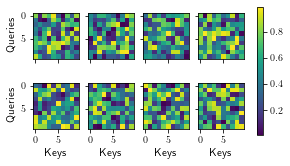

In [6]:
# attention_weights = torch.eye(10).reshape((1, 1, 10, 10))
attention_weights = torch.rand(size=(2, 4, 10, 10))
show_heatmaps(
    attention_weights, xlabel="Keys", ylabel="Queries", figsize=(12 * CM, 6 * CM)
)


In [7]:
# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return pos * angle_rates


def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model
    )

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return pos_encoding


(1, 64, 96)


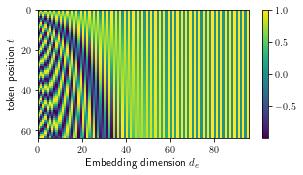

In [8]:
tokens = 64
dimensions = 96


pos_encoding = positional_encoding(tokens, dimensions)
print(pos_encoding.shape)

plt.figure(figsize=(12 * CM, 6 * CM))
plt.pcolormesh(pos_encoding[0], cmap=cmap)
plt.xlabel("Embedding dimension $d_e$")
plt.xlim((0, dimensions))
plt.ylim((tokens, 0))
plt.ylabel("token position $t$")
plt.colorbar()
plt.savefig("../reports/Graphs/positional-encoding.pdf", bbox_inches="tight")
